In [173]:
import numpy as np
import pandas as pd
data = pd.read_csv("fraud_data.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [174]:
X = data.copy()
X.drop('Class', axis = 1, inplace = True)
y = data['Class'].copy()

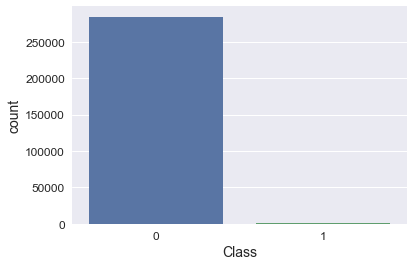

In [175]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.countplot(x='Class', data = data)
plt.show()

We see that there is a high imbalance in the class levels of our data. As a result, we need to stratify our data.

In [176]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state = 0)

k-NN classification

In [178]:
from sklearn.neighbors import KNeighborsClassifier

trainscore=[]
testscore=[]
for n in range(1,6):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    trainscore.append(knn.score(X_train, y_train))
    testscore.append(knn.score(X_test, y_test))
    print('Neigbors: {:.0f}'.format(n))
    print('Accuracy: {:.3f}'.format(knn.score(X_test, y_test)))    
    


Neigbors: 1
Accuracy: 0.998
Neigbors: 2
Accuracy: 0.998
Neigbors: 3
Accuracy: 0.998
Neigbors: 4
Accuracy: 0.998
Neigbors: 5
Accuracy: 0.998


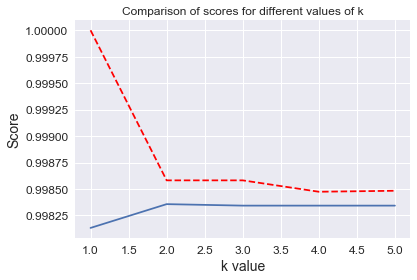

In [179]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),trainscore, 'r--', range(1,6), testscore,'-') 
plt.title('Comparison of scores for different values of k')
plt.xlabel('k value')
plt.ylabel('Score')
plt.show()

LOGIT

In [180]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=100).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_lr.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00


SVC (Linear)

In [181]:
from sklearn.svm import SVC
clf_SVC_linear = SVC(kernel = 'linear', C= 1.0).fit(X_train, y_train)
print('Accuracy of SVC(Linear) classifier on training set: {:.2f}'
     .format(clf_SVC_linear.score(X_train, y_train)))
print('Accuracy of SVC(Linear) classifier on test set: {:.2f}'
     .format(clf_SVC_linear.score(X_test, y_test)))


Accuracy of SVC(Linear) classifier on training set: 1.00
Accuracy of SVC(Linear) classifier on test set: 1.00


In [ ]:
from sklearn.svm import SVC
clf_SVC = SVC().fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf_SVC.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(clf_SVC.score(X_test, y_test)))

DECISION TREE

In [171]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


NAIVE BAYES

In [10]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
print('Accuracy of Naive Bayes on training set: {:.3f}'.format(clf_nb.score(X_train,y_train)))
print('Accuracy of Naive Bayes on test set: {:.3f}'.format(clf_nb.score(X_test,y_test)))


Accuracy of Naive Bayes on training set: 0.993
Accuracy of Naive Bayes on test set: 0.992


RANDOM FOREST

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_features = 15, random_state = 0)
clf_rf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf_rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf_rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 1.00


EVALUATION TECHNIQUES

DUMMY CLASSIFIER

In [24]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)

0.99827252043481929

In [13]:
from sklearn.metrics import confusion_matrix

y_dummy = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_dummy)

print('Most frequent class (dummy classifier)\n', confusion)

('Most frequent class (dummy classifier)\n', array([[71079,     0],
       [  123,     0]], dtype=int64))


In [14]:
y_knn = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_knn)
print('Most frequent class (k-NN)\n', confusion)

('Most frequent class (k-NN)\n', array([[71079,     0],
       [  118,     5]], dtype=int64))


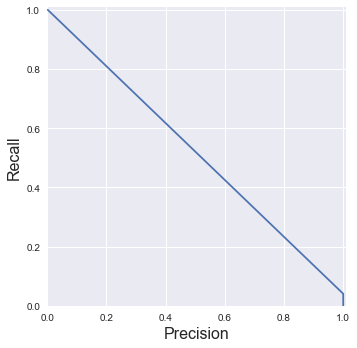

In [57]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_knn)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

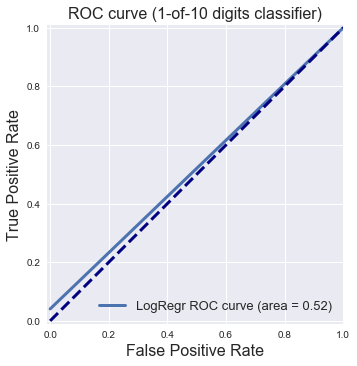

In [16]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_knn)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [17]:
y_logit = clf_lr.predict(X_test)
confusion = confusion_matrix(y_test, y_logit)
print('Most frequent class (LOGIT)\n', confusion)

('Most frequent class (LOGIT)\n', array([[71050,    29],
       [   55,    68]], dtype=int64))


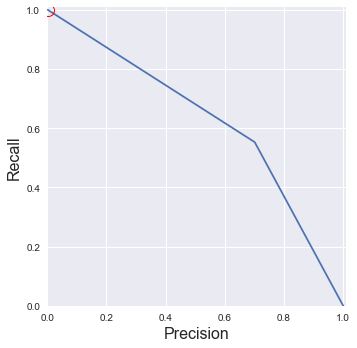

In [59]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_logit)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r',mew=1)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

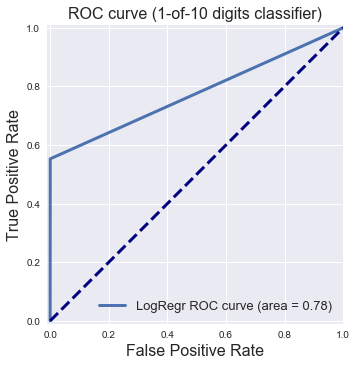

In [19]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_logit)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

y_SVC_linear = clf_SVC_linear.predict(X_test)
confusion = confusion_matrix(y_test, y_SVC_linear)
print('Most frequent class (LOGIT)\n', confusion)

In [ ]:
from sklearn.svm import SVC
clf_SVC_linear = SVC(kernel = 'linear', C= 1.0).fit(X_train, y_train)
print('Accuracy of SVC(Linear) classifier on training set: {:.2f}'
     .format(clf_SVC_linear.score(X_train, y_train)))
print('Accuracy of SVC(Linear) classifier on test set: {:.2f}'
     .format(clf_SVC_linear.score(X_test, y_test)))


In [ ]:
from sklearn.svm import LinearSVC

clf_SVC = LinearSVC(C= 1.0).fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf_SVC.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test)))from sklearn.svm import SVC


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

The below code for kernel = rbf is taking too long to execute

In [ ]:
from sklearn.svm import SVC
clf_SVC = SVC().fit(X_train, y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf_SVC.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(clf_SVC.score(X_test, y_test)))

In [22]:
y_dt = clf_dt.predict(X_test)
confusion = confusion_matrix(y_test, y_dt)
print('Most frequent class (Decision Tree)\n', confusion)

('Most frequent class (Decision Tree)\n', array([[71058,    21],
       [   31,    92]], dtype=int64))


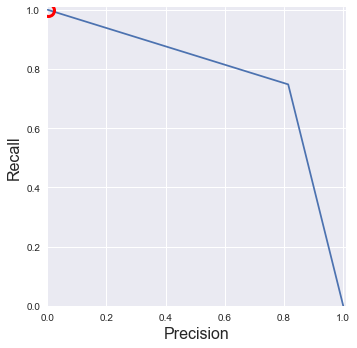

In [23]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_dt)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [66]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_dt)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
print(closest_zero)
print(closest_zero_p)
print(closest_zero_r)
print(precision)
print(recall)
print(thresholds)



0
0.00172747956518
1.0
[ 0.00172748  0.90384615  1.        ]
[ 1.          0.76422764  0.        ]
[0 1]


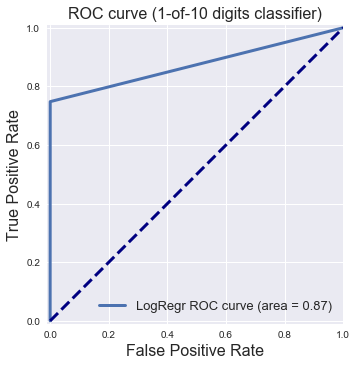

In [24]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_dt)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [25]:
y_nb = clf_nb.predict(X_test)
confusion = confusion_matrix(y_test, y_nb)
print('Most frequent class (Naive Bayes) \n', confusion)

('Most frequent class (Naive Bayes) \n', array([[70587,   492],
       [   48,    75]], dtype=int64))


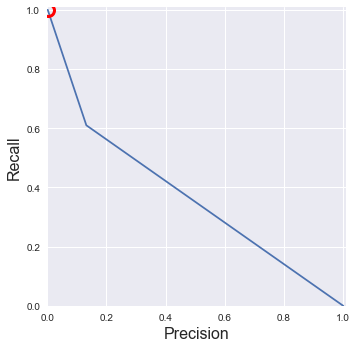

In [68]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_nb)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

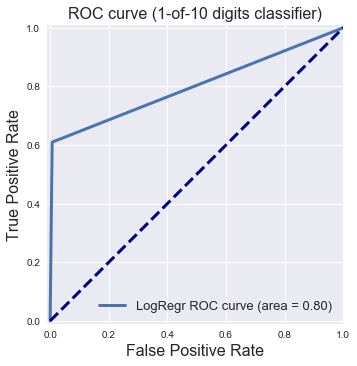

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_nb)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [28]:
y_rf = clf_rf.predict(X_test)
confusion = confusion_matrix(y_test, y_rf)
print('Most frequent class (Random Forest)\n', confusion)

('Most frequent class (Random Forest)\n', array([[71070,     9],
       [   30,    93]], dtype=int64))


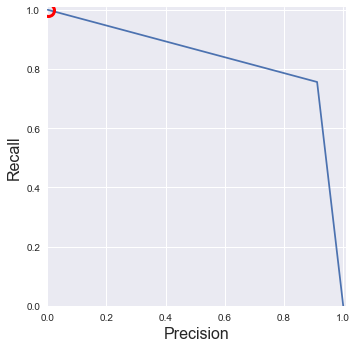

In [29]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_rf)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

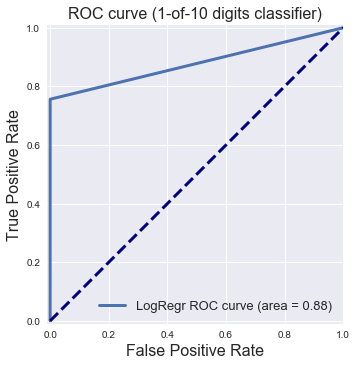

In [30]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [14]:
from sklearn.metrics import classification_report
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_dummy, target_names=['not 1', '1']))
print('k-NN\n', 
      classification_report(y_test, y_knn, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, y_logit, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, y_dt, target_names = ['not 1', '1']))
print('Naive Bayes\n', 
      classification_report(y_test, y_nb, target_names = ['not 1', '1']))
print('Random Forest\n', 
      classification_report(y_test, y_rf, target_names = ['not 1', '1']))

NameError: name 'y_dummy' is not defined

Now since Decision Tree Classifier and Random Forest classifier gices us the best recall, we will run the model with different depths to check the change in False Negatives.

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for n in range (2,10):
    clf_dt = DecisionTreeClassifier(max_depth = n).fit(X_train, y_train)
    y_dt = clf_dt.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_dt).ravel()
    print('Maximum Depth: {:.0f}'.format(n))
    print("False Negative: {:.0f}".format(fn))
    print('True Positive: {:.0f}'.format(tp))
    print('Decision tree\n', 
      classification_report(y_test, y_dt, target_names = ['not 1', '1']))
    auc_score_dt = roc_auc_score(y_test, y_dt, sample_weight=None)
    print('Area under Curve: {:.2f}'.format(auc_score_dt))
    print('-----------------------------------------')

NameError: name 'confusion_matrix' is not defined

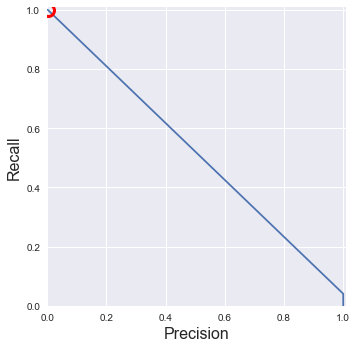

In [33]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_knn)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [34]:
for n in range (2,15):
    clf_rf = RandomForestClassifier(max_features = n, random_state = 0)
    clf_rf.fit(X_train, y_train)
    y_rf = clf_rf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_rf).ravel()
    print('Maximum Depth: {:.0f}'.format(n))
    print("False Negative: {:.0f}".format(fn))
    print('True Positive: {:.0f}'.format(tp))
    print('Decision tree\n', 
      classification_report(y_test, y_dt, target_names = ['not 1', '1']))
    auc_score_dt = roc_auc_score(y_test, y_rf, sample_weight=None)
    print('Area under Curve: {:.2f}'.format(auc_score_dt))
    print('-----------------------------------------')
    
    

Maximum Depth: 2
False Negative: 39
True Positive: 84
('Decision tree\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.90      0.76      0.83       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.84
-----------------------------------------
Maximum Depth: 3
False Negative: 34
True Positive: 89
('Decision tree\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.90      0.76      0.83       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.86
-----------------------------------------
Maximum Depth: 4
False Negative: 40
True Positive: 83
('Decision tree\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.90      0.76      0.83       123\n\navg / total       1.00      1.

ENSEMBLE BAGGING AND PASTING

SINCE NAVIE BAYES, RANDOM FOREST AND DECISION TREE ARE GIVING THE HIGHEST RECALL, WE WILL USE THEM WITH VOTING CLASSIFIER

HARD VOTING

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

clf_nb = GaussianNB()
clf_rf = RandomForestClassifier(random_state=42, max_depth =5)
clf_dt = DecisionTreeClassifier(random_state =42, max_depth = 9)

voting_clf = VotingClassifier(estimators=[('nb', clf_nb), ('rf', clf_rf), ('dt', clf_dt)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB(priors=None)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fra...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))],
         n_jobs=1, voting='hard', weights=None)

In [38]:
for clf in (clf_nb, clf_rf, clf_dt, voting_clf):
    clf.fit(X_train, y_train)
    y_voting = clf.predict(X_test)

In [39]:
print('Voting Classifier\n', 
      classification_report(y_test, y_voting, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_voting, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

('Voting Classifier\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.87      0.70      0.77       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.85


SOFT VOTING

In [40]:
voting_clf = VotingClassifier(estimators=[('nb', clf_nb), ('rf', clf_rf), ('dt', clf_dt)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB(priors=None)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sampl...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [41]:
for clf in (clf_nb, clf_rf, clf_dt, voting_clf):
    clf.fit(X_train, y_train)
    y_softvoting = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_softvoting))

('GaussianNB', 0.99241594337237715)
('RandomForestClassifier', 0.99933990618241064)
('DecisionTreeClassifier', 0.9994522625768939)
('VotingClassifier', 0.99932586163310022)


In [42]:
print('Voting Classifier\n', 
      classification_report(y_test, y_softvoting, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_softvoting, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

('Voting Classifier\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.87      0.72      0.79       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.86


BAGGING and PASTING

In [43]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth =5 ), n_estimators=50, max_samples=210000, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_bagging = bag_clf.predict(X_test)

In [44]:
print('Bagging\n', 
      classification_report(y_test, y_bagging, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_bagging, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

('Bagging\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.91      0.78      0.84       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.89


In [45]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth =5 ), n_estimators=50, max_samples=210000, bootstrap=False, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pasting = bag_clf.predict(X_test)

In [46]:
print('Pasting\n', 
      classification_report(y_test, y_pasting, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_pasting, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

('Pasting\n', u'             precision    recall  f1-score   support\n\n      not 1       1.00      1.00      1.00     71079\n          1       0.90      0.78      0.83       123\n\navg / total       1.00      1.00      1.00     71202\n')
Area under Curve: 0.89


Adding Boosting to the Bagging classifier

In [183]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.01, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ab = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ab))

0.998918569703


In [184]:
print('ADA Boosting\n', 
      classification_report(y_test, y_pred_ab, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_pred_ab, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

ADA Boosting
              precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.83      0.47      0.60       123

avg / total       1.00      1.00      1.00     71202

Area under Curve: 0.74


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 1.00



In [27]:
y_boosting = clf.predict(X_test)
print('Boosting\n', 
      classification_report(y_test, y_boosting, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_boosting, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

Boosting
              precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.83      0.64      0.72       123

avg / total       1.00      1.00      1.00     71202

Area under Curve: 0.82


**Dimension Reduction by PCA**

In [142]:
X_pca = X.values


In [143]:
from sklearn.preprocessing import scale
X_pca = scale(X_pca)

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)

pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [145]:
var= pca.explained_variance_ratio_

In [127]:
var

array([ 0.06527521,  0.05612313,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.01052982,  0.00140516])

In [128]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [129]:
var1

array([  6.53,  12.14,  15.47,  18.8 ,  22.13,  25.46,  28.79,  32.12,
        35.45,  38.78,  42.11,  45.44,  48.77,  52.1 ,  55.43,  58.76,
        62.09,  65.42,  68.75,  72.08,  75.41,  78.74,  82.07,  85.4 ,
        88.73,  92.06,  95.39,  98.72,  99.77,  99.91])

In [130]:
plt.plot(var1)

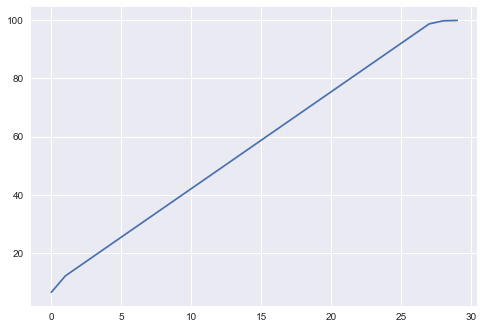

In [131]:
plt.show()

In [156]:
#Looking at above plot- taking 27 variables
pca = PCA(n_components=20)
X1_pca=pca.fit_transform(X_pca)

print(X1_pca)

[[ 0.41663045 -2.53266428 -0.73416262 ..., -0.22884142 -0.17544226
   0.28949991]
 [-0.39345348 -2.0773255  -0.48830255 ..., -0.28543176  0.10871542
   0.2271435 ]
 [ 1.86852545 -2.53349699 -0.14923372 ...,  2.25576794  0.53281386
  -1.7044035 ]
 ..., 
 [-0.19406338  2.07078798 -0.02118364 ...,  0.53157552  1.16498636
   1.17567553]
 [-0.46608925  1.22539363 -0.24627381 ..., -1.96111715 -1.85536823
   1.41841125]
 [ 0.76759651  1.90590292  0.09723241 ...,  0.63717347  0.52992947
  -0.77768249]]


In [157]:
X2_pca = pd.DataFrame(X1_pca)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X2_pca, y, stratify = y , random_state = 0)

In [159]:
#AUC for reduced model with Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42, max_depth =5 ), n_estimators=50, max_samples=210000, bootstrap=False, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pasting = bag_clf.predict(X_test)

In [160]:
print('Pasting\n', 
      classification_report(y_test, y_pasting, target_names=['not 1', '1']))
auc_score_dt = roc_auc_score(y_test, y_pasting, sample_weight=None)
print('Area under Curve: {:.2f}'.format(auc_score_dt))

Pasting
              precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.93      0.64      0.76       123

avg / total       1.00      1.00      1.00     71202

Area under Curve: 0.82


In [151]:
voting_clf = VotingClassifier(estimators=[('nb', clf_nb), ('rf', clf_rf), ('dt', clf_dt)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB(priors=None)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fra...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))],
         n_jobs=1, voting='soft', weights=None)

In [161]:
#accuracy for reduced dimensions model

for clf in (clf_nb, clf_rf, clf_dt, voting_clf):
    clf.fit(X_train, y_train)
    y_softvoting = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_softvoting))

GaussianNB 0.980927502036
RandomForestClassifier 0.999087104295
DecisionTreeClassifier 0.999171371591
VotingClassifier 0.999129237943


In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.998272520435
